In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import pickle

# Project desription

The dataset contains 
Goal of this project is to study the reasons behind employees churning, and make a predictive model which lets you know when an employee is about to churn.

The dataset contains following columns (features) associated to each of its employees,

### Features:

'satisfaction_level': How satisfied employees is?

'last_evaluation': When was performance of employee evaluated last time?

'number_project': Number of projects an employee is taking on

'average_montly_hours': Average hour an employee commiting to organisation

'time_spend_company': Total time spent at the company

'Work_accident': Has employee been through any work related accidents?

'promotion_last_5years': if promoted in last 5 years or not

'dept': which department? 

'salary': Employee's salary?

### Target:

'left': 1 means employee has left and 0 means employee is still working

## Creating dataframe and performing EDA

In [326]:
df=pd.read_csv("HR_data.csv")
data=df.copy()

In [327]:
df.shape

(14999, 10)

In [328]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [329]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [330]:
#Numerical data stats
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [331]:
#Categorical data stats
df.describe(include=['O'])

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [332]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

## Data Analysis

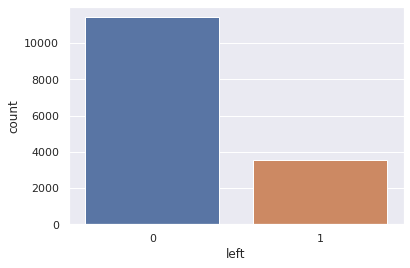

In [333]:
#Number of employees left?
sns.set()
sns.countplot(x='left', data=df)
plt.show()

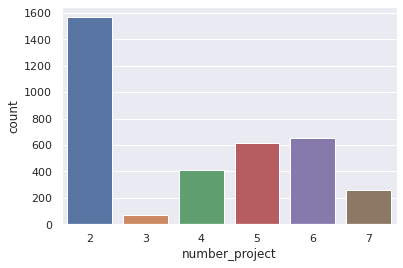

In [334]:
sns.countplot(x='number_project', data=df[df.left==1])
plt.show()

#We can see that the people handling 2 projects are very likely to leave due to less exposure and growth issues


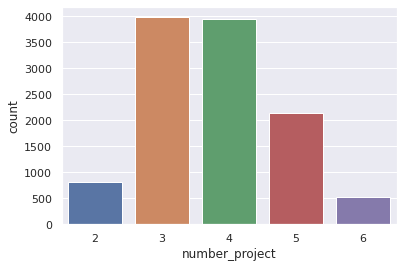

In [335]:
sns.countplot(x='number_project', data=df[df.left==0])
plt.show()

#Most employees are currently working on 2 or 3 projects

In [336]:
df_np=df.groupby('number_project')['left'].value_counts(normalize=True).reset_index(name='%')
df_np['%']=df_np['%']*100
df_np.head(4)

,number_project,left,%
0,2,1,65.619765
1,2,0,34.380235
2,3,0,98.224414
3,3,1,1.775586


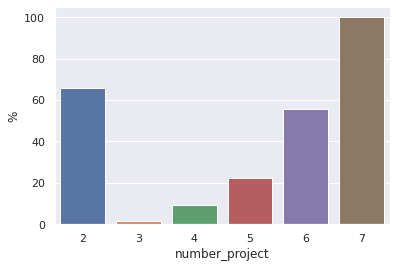

In [337]:
sns.barplot(y='%',x='number_project', data=df_np[df_np.left==1])
plt.show()

From the plot above we can conlude that by working on 2 projects or greater than 5 projects, there is more risk of employee turnover

### Most employees leave after how many years?

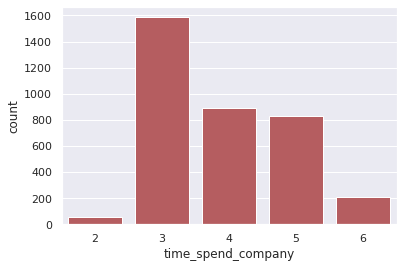

In [338]:
sns.countplot(x='time_spend_company', data=df[df.left==1],color='r')
plt.show()

Most number of employees leave at 3rd year of employment, however that's 24% of the total employees with 3 years experience at the company

In [339]:
df_ts=df.groupby('time_spend_company')['left'].value_counts(normalize=True).reset_index(name='%')
df_ts['%']=df_ts['%']*100
df_ts.head(6)

,time_spend_company,left,%
0,2,0,98.366215
1,2,1,1.633785
2,3,0,75.384138
3,3,1,24.615862
4,4,0,65.193586
5,4,1,34.806414


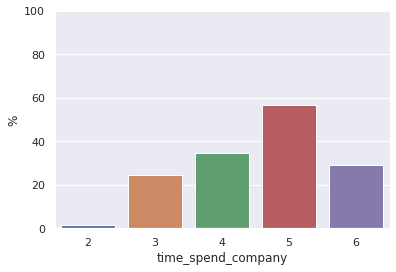

In [340]:
sns.barplot(y='%',x='time_spend_company', data=df_ts[df_ts.left==1])
plt.ylim([0,100])
plt.show()

There is 60% likelihood of an employee to churn at 5th year of employment. While the lowest is 1.63% churn rate at 2 years of employment.

### If work related accidents result in employees to churn?

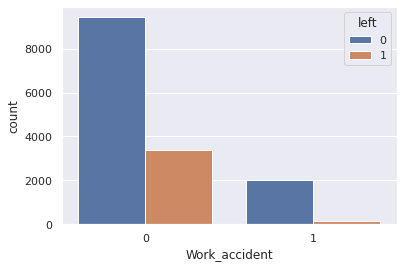

In [341]:
#counting the number of work related accidents recorded

sns.countplot(x='Work_accident', hue='left', data=df)
plt.show()

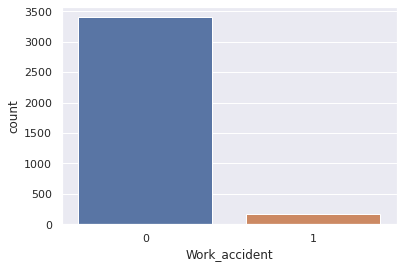

In [342]:
#If there is actually a relation of work related accidents to employee churn?

sns.countplot(x='Work_accident',data=df[df.left==1])
plt.show()

In [343]:
df.groupby('Work_accident')['left'].value_counts(normalize=True).reset_index(name='%')

,Work_accident,left,%
0,0,0,0.734840
1,0,1,0.265160
2,1,0,0.922084
3,1,1,0.077916


From the analysis we can't conclude that work related accidents contribute much to churning rate of employees. Infact not many employees had accidents and only 7% of those who had accident in some point of their career left 

### If churning rate has relation with employee's promotion in last 5 years?

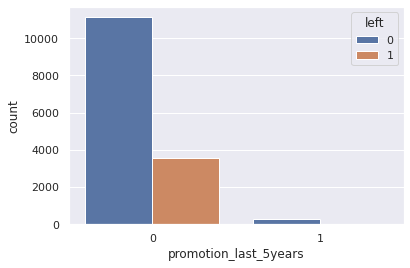

In [344]:
sns.countplot(x='promotion_last_5years', data=df, hue='left')
plt.show()

In [345]:
# only 6% of those who were promoted in last 5 years, left

df[df.promotion_last_5years==1].left.value_counts()

0    300
1     19
Name: left, dtype: int64

In [346]:
# There is 32% likelihood of churning in not promoted in 5 years

df[df.promotion_last_5years==0].left.value_counts()

0    11128
1     3552
Name: left, dtype: int64

The churn rate is around 5 times lesser for employees who are promoted in last 5 years

### Let us now analyse the salary trends and their influence on the employee churning rate

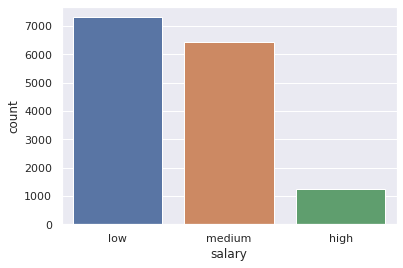

In [347]:
sns.countplot(x='salary', data=df)
plt.show()

In [348]:
df[df.salary == 'high'].left.value_counts(normalize=True)

0    0.933711
1    0.066289
Name: left, dtype: float64

6% churn rate for high salaried class, lowest of all classes

In [349]:
df[df.salary == 'medium'].left.value_counts(normalize=True)

0    0.795687
1    0.204313
Name: left, dtype: float64

In [350]:
df[df.salary == 'low'].left.value_counts(normalize=True)

0    0.703116
1    0.296884
Name: left, dtype: float64

In [351]:
df_s = df.groupby('salary')['left'].value_counts(normalize=True).reset_index(name='%')
df_s['%'] = df_s['%']*100

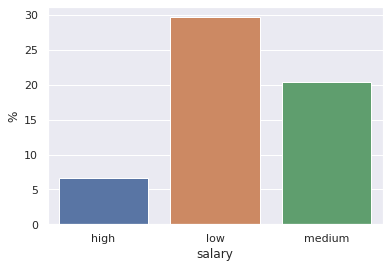

In [352]:
sns.barplot(x='salary', y='%', data=df_s.query("left==1"))
plt.show()

Low and Medium salaried class are more likely to churn as compared to high salaried class in the company.

### Department wise churning rate?

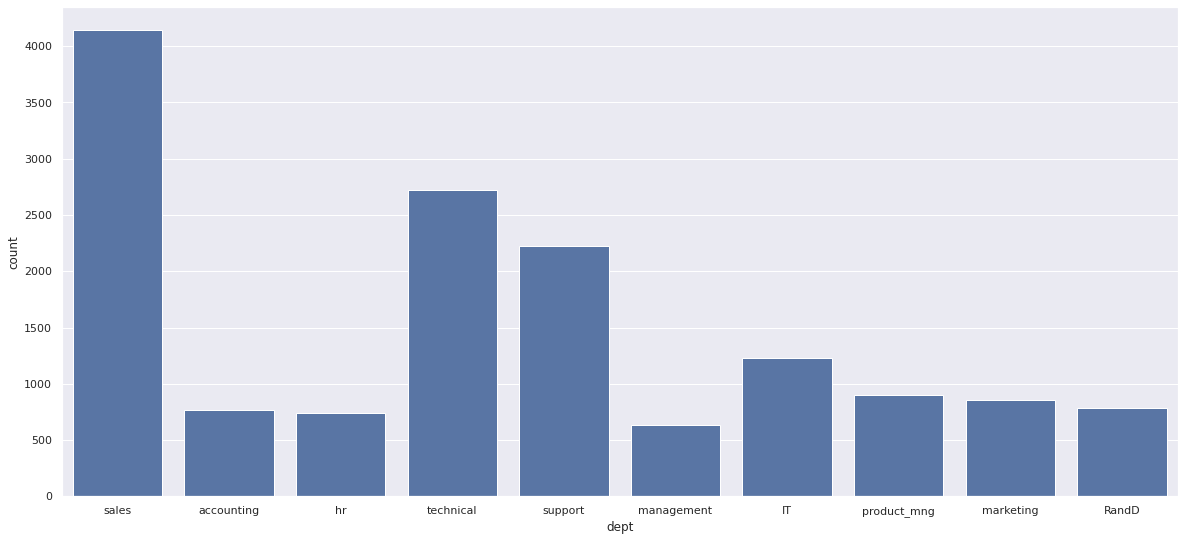

In [353]:
plt.figure(figsize=(20, 9))
sns.countplot(x='dept', data=df, color='b')
plt.show()

Highest number of employees left from Sales department

In [354]:
# Write code here
df_d = df.groupby('dept')['left'].value_counts(normalize=True).reset_index(name='%')
df_d['%'] = df_d['%']*100

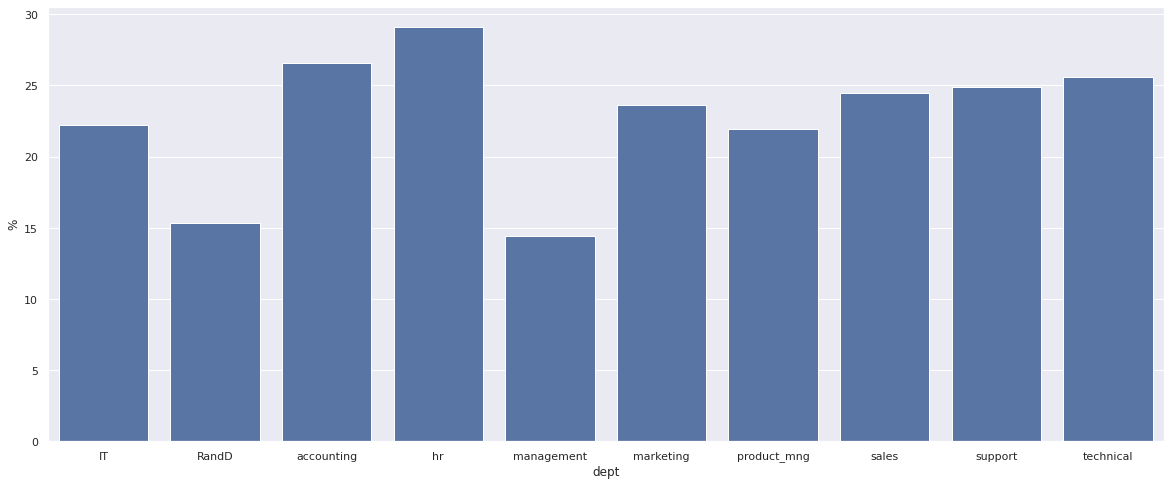

In [355]:
plt.figure(figsize=(20, 8))
sns.barplot(x='dept', y='%', data=df_d[df_d.left == 1], color='b')
plt.show()

Highest churn rate is of HR department while lowest is of management department

### Satisfaction level related to churning rate?

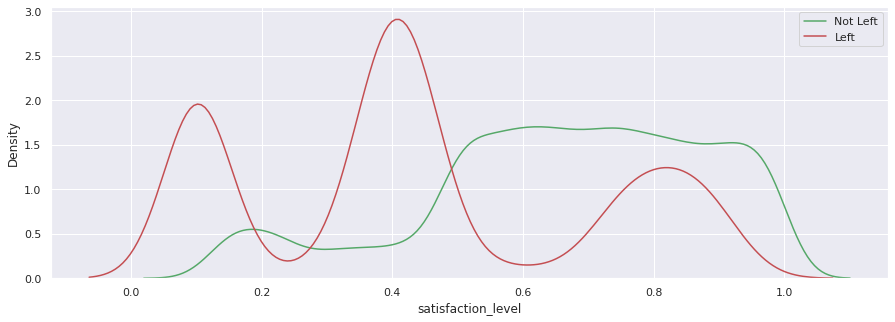

In [356]:
plt.figure(figsize=(15,5))

sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], label="Not Left", color='g')
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], label="Left", color='r')

plt.legend()
plt.show()

Clear from the distribution that employees with satisfaction level below 0.5 are more likely to churn, and those with greater than 0.5 are highly likely to stay

Creating a new column "satisfaction category", with a threshold of high and low satisfaction level as "low" if < 0.5 & "high" if >= 0.5, for the sake of simplicity

In [357]:
df['satisfaction_category']=pd.cut(df['satisfaction_level'],bins=[0,0.49,1.01],labels=['low','high'])

In [358]:
df.satisfaction_category.value_counts()

high    10416
low      4583
Name: satisfaction_category, dtype: int64

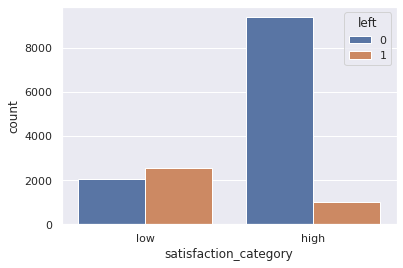

In [359]:
sns.countplot(x='satisfaction_category', data=df, hue='left')
plt.show()

There is fairly high chance of churn if employee's satisfaction level's low

In [360]:
df.corr()['satisfaction_level']

satisfaction_level       1.000000
last_evaluation          0.105021
number_project          -0.142970
average_montly_hours    -0.020048
time_spend_company      -0.100866
Work_accident            0.058697
left                    -0.388375
promotion_last_5years    0.025605
Name: satisfaction_level, dtype: float64

We can see that there is correlation of job satisfaction with respect to employee's leaving a company

There is also relation of satisfaction levels with number of projects assigned, time spent at company and last evaluation

In [361]:
df_cat=df.groupby('satisfaction_category')['number_project'].value_counts(normalize=True).reset_index(name='%')
df_cat.head()

,satisfaction_category,number_project,%
0,low,2,0.392101
1,low,6,0.206415
2,low,4,0.121754
3,low,3,0.120227
4,low,5,0.104735


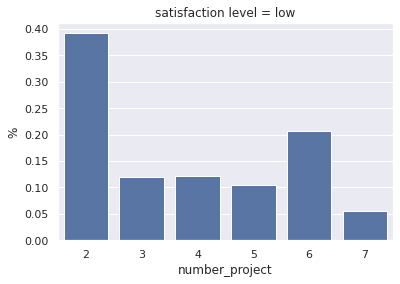

In [362]:
plt.title('satisfaction level = low')
sns.barplot(data=df_cat[df_cat.satisfaction_category=="low"], x='number_project', y='%', color='b')
plt.show()

Job satisfaction level is considerably lower when handling 2 projects

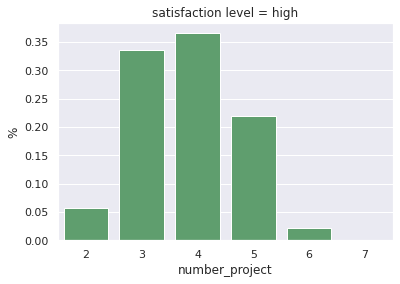

In [363]:
plt.title('satisfaction level = high')
sns.barplot(data=df_cat[df_cat.satisfaction_category=="high"], x='number_project', y='%', color='g')
plt.show()

Job satisfaction is higher when handling 3,4 or 5 projects atleast

Creating another column based on projects assigned, "employee_work_load" based on whether overburdened (>= 6 projects), unburdened (<=2), ideal ( >2 & <6)

In [373]:
df['employee_work_load']=pd.cut(df['number_project'],bins=[-np.inf,2,5,np.inf],labels=['unburdened','ideal','overburdened'])

In [374]:
df[['employee_work_load','number_project']].value_counts()

employee_work_load  number_project
ideal               4                 4365
                    3                 4055
                    5                 2761
unburdened          2                 2388
overburdened        6                 1174
                    7                  256
dtype: int64

<AxesSubplot:xlabel='employee_work_load', ylabel='count'>

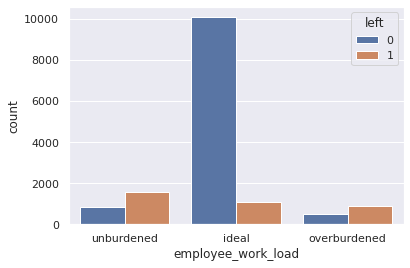

In [379]:
sns.countplot(x='employee_work_load', data=df, hue='left')

Overburdened or unburdened employees are likely to leave more. Handling 3 to 5 projects at a time is the ideal case where there is less likelihood of employee leaving

In [386]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'satisfaction_category',
       'employee_work_load'],
      dtype='object')

In [389]:
df=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'satisfaction_category',
       'employee_work_load', 'left']]
#positing target variable in the end

## Model Development

In [392]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,satisfaction_category,employee_work_load,left
0,0.38,0.53,2,157,3,0,0,sales,low,low,unburdened,1
1,0.80,0.86,5,262,6,0,0,sales,medium,high,ideal,1
2,0.11,0.88,7,272,4,0,0,sales,medium,low,overburdened,1
3,0.72,0.87,5,223,5,0,0,sales,low,high,ideal,1
4,0.37,0.52,2,159,3,0,0,sales,low,low,unburdened,1


In [393]:
#one hot encoding of all categorical columns
df_model = pd.get_dummies(df,columns=['dept','salary','satisfaction_category','employee_work_load'])
df_model.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,dept_IT,dept_RandD,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_category_low,satisfaction_category_high,employee_work_load_unburdened,employee_work_load_ideal,employee_work_load_overburdened
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


In [394]:
#getting feature and target variable

X=df_model.drop('left',axis=1)
y=df_model['left']

In [398]:
# Write code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9749, 25) (9749,)
(5250, 25) (5250,)


In [404]:
pickle.dump(X_train,open('X_train.pkl','wb'))

In [405]:
pickle.dump(X_test,open('X_test.pkl','wb'))

In [406]:
pickle.dump(y_train,open('y_train.pkl','wb'))

In [407]:
pickle.dump(y_test,open('y_test.pkl','wb'))